<a href="https://colab.research.google.com/github/ardaericoyud/Image-Classification/blob/main/Submission_Belajar_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>INFORMASI DIRI</center></h1>


**Arda Erico Yuda**

![an image](https://img.icons8.com/material-two-tone/2x/incoming-call.png)
**081338103363*

![an image](https://img.icons8.com/fluent-systems-regular/2x/gmail.png)
**ardaericoyudha00@gmail.com**

![an image](https://img.icons8.com/material-rounded/2x/address.png)
**Surabaya, Jawa Timur**

![an image](https://img.icons8.com/fluent-systems-filled/2x/linkedin.png)
[Linkedin](https://www.linkedin.com/in/ardaericoyud/)

<h1><center>Submission at Dicoding</center></h1>

#### Klasifikasi Gambar

Membuat program jaringan saraf tiruan menggunakan TensorFlow. Program harus mampu mengenali bentuk tangan yang membentuk gunting, batu, atau kertas.

In [1]:
# Mengimport Library yang digunakan
import tensorflow as tf
import zipfile,os,shutil
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load Dataset dari website
!wget --no-check-certificate \
        https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
        -O /tmp/rockpaperscissors.zip

--2023-11-18 15:51:09--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 20.60.139.65
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|20.60.139.65|:443... connected.
HTTP request sent, awaiting response... 404 The specified resource does not exist.
2023-11-18 15:51:09 ERROR 404: The specified resource does not exist..



Karena Dataset masih dalam bentuk ZIP, kita perlu mengekstrak datanya. Kemudian mendefinisikan suatu direktori untuk data latih dan dan validasi


In [4]:
#ekstrak dataset
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

BadZipFile: ignored

In [5]:
# Penggunaan Callback mencegah overfitting dan menghentikan training setelah akurasi terpenuhi
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi melewati 97%, hentikan proses training!")
      self.model.stop_training = True

callbacks = myCallback()

In [6]:
# split dataset kemudian membuat direktori
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
roc_dir = os.path.join(base_dir,'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')

In [7]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

FileNotFoundError: ignored

In [8]:
train_roc = os.path.join(train_dir, 'rock')
train_pap = os.path.join(train_dir, 'paper')
train_sci = os.path.join(train_dir, 'scissors')
val_roc = os.path.join(validation_dir, 'rock')
val_pap = os.path.join(validation_dir, 'paper')
val_sci = os.path.join(validation_dir, 'scissors')

In [9]:
os.mkdir(train_roc)
os.mkdir(train_pap)
os.mkdir(train_sci)
os.mkdir(val_roc)
os.mkdir(val_pap)
os.mkdir(val_sci)

FileNotFoundError: ignored

Dari direktori yang ada, dibuat sub-kategori untuk menampung data training dan data validasi dengan pembagiannya 40% data validasi dari total dataset.

In [10]:
# train dan test split
# memecah setiap direktori menjadi data train dan data validasi(validation 40% of dataset)
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)

FileNotFoundError: ignored

In [11]:
for file in train_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(train_roc, file))
for file in train_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(train_pap,file))
for file in train_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(train_sci,file))
for file in val_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(val_roc,file))
for file in val_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(val_pap,file))
for file in val_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(val_sci,file))

NameError: ignored

Untuk mempersiapkan data dan mengaugmentasi gambar dari data baru menggunakan Image Data Generator.

In [12]:
# augmentation and generate image data
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

FileNotFoundError: ignored

Dari ukuran pembagian data validasi 40% dari total dataset, ditemukan: Data training memiliki 1312 sampel gambar dengan 3 class, dan Data validasi memiliki 876 sampel gambar dengan 3 class.

Setelah data kita telah siap, kita bisa membangun arsitektur sebuah CNN.

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

Setelah membuat arsitektur dari CNN, kemudian memanggil fungsi compile pada object model, dan tentukan loss function serta optimizer.

compile model dengan optimizer = 'Adam' dan loss function = 'categorical_crossentropy'

loss function pada kasus klasifikasi 2 class dan 3 class berbeda. 2 class menggunakan 'binary crossentropy' sedangkan 3 class menggunakan 'categorical_crossentropy'.

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch = 41, # 1312 images = batch_size * steps
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27, # 876 images = batch_size * steps
    verbose =2,
      callbacks=[callbacks]
)

NameError: ignored

Meliat Grafik dari 'loss dan training loss' serta 'training accuracy dan validation accuracy'.

In [17]:
# plot loss train & validation
plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Loss & Validation Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

NameError: ignored

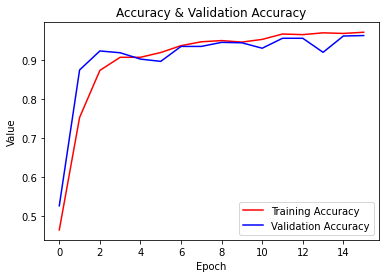

In [ ]:
# plot accuracy train & validation
plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Accuracy & Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Mengunggah gambar untuk diprediksi

Saving Screenshot 2023-11-16 010233.png to Screenshot 2023-11-16 010233.png
1/1 [==============================] - 0s 220ms/step


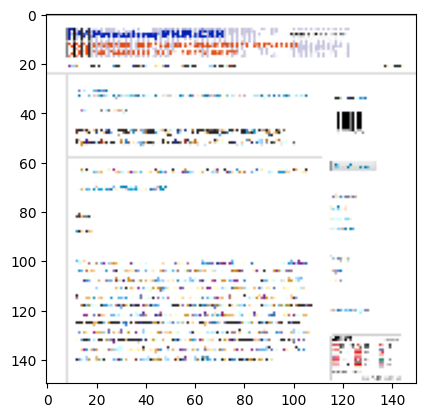

In [18]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

In [20]:
  print(fn)
  if classes[0,0]!=0:
    print('Gunting')
  elif classes[0,1]!=0:
    print('Batu')
  else:
    print('Kertas')

Screenshot 2023-11-16 010233.png
Gunting
